# Data Mining Techniques


In [1]:
%matplotlib inline

import pandas as pd             
import numpy as np

# Visualization packages 
import matplotlib.pyplot as plt 
import seaborn as sns



## Similarity Measures

This script captures data mining techniques. We will start with the simple similarity measures as a start
(which you have seen in lecture 2), and gradually move forward from there.

### Euclidean Score

- Is the distance between two point, the straight line distance between them. In the preference space we can define the distance between a pair of points : $$d(user_{i}, user_{j}) = \sqrt{(x_{1} - x_{2})^2 + (y_{1} - y_{2})^2}$$

Below is a function you can use to compute the Euclidean distance of two vectors. Pretty neat, I would say

In [2]:
#Function to compute Euclidean Distance. 
def euclidean(v1, v2):
    
    #Convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    #Compute vector which is the element wise square of the difference
    diff = np.power(np.array(v1)- np.array(v2), 2)
    
    #Perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    
    #Compute square root and return final Euclidean score
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score


In [3]:
#Define 3 users with ratings for 5 movies

u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

## 
user_item_matrix = pd.DataFrame(index=['u1','u2','u3'], data= {'M1':[5,1,5], 'M2':[1,5,2],'M3':[2,4,2],'M4':[4,2,4],'M5':[5,1,4]})
user_item_matrix

,M1,M2,M3,M4,M5
u1,5,1,2,4,5
u2,1,5,4,2,1
u3,5,2,2,4,4


In [4]:
euclidean(u1, u2)

7.483314773547883

In [5]:
euclidean(u1, u3)

1.4142135623730951

### Pearson Correlation

- In statistics, the Person correlation coefficient is a measure of the linear relation or correlation between two variables X and Y.  It has a value between +1 and -1 inclusive,  where 1 is total positive linear correlation, 0 is no linear correlation, and -1 is a total negative linear correlation. In the recommender system, we're supposed to figure out how related two people are based on the items they have both ranked. can be computed using the following formula: $$r = \frac{\sum(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sqrt{\sum(x_{i} - \bar{x})^2\sum(y_{i} - \bar{y})^2}}$$  with $\bar{x}$ and $\bar{y}$ are means for y and x variables respectively.

In [6]:
alice = [1,1,3,2,4]
bob = [2,2,4,3,5]

euclidean(alice, bob)

2.23606797749979

In [7]:
eve = [5,5,3,4,2]

euclidean(eve, alice)

6.324555320336759

In [8]:
## Import predefined person correlation function 

from scipy.stats import pearsonr

pearsonr(alice, bob)

(1.0, 0.0)

In [9]:
pearsonr(alice, eve)

(-1.0, 0.0)

## Clustering

Is a type of unsupervised learning methods, that leads to dividing the population into or data point into a number of groups, such that data points in the same group have the same preference and characteristics.  Those groupings are called clusters. There are several type of clustering algorithms:
        
        - Density based : separating data based on the density of points in a data space.
        - Distribution based: creating clustering based on how probable is that all data point of the cluster belong to the same distribution.
        - Centroid based: clustering the data points based on the distance to the centroid of the cluster.

#### K-Means
- K-means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in 5 steps:

        1- Specify the desired number of clusters K
        2- Randomly assign each data point to a cluster
        3- Compute cluster centroids 
        4- Re-assign each point to the closest cluster centroid
        5- Re-compute the centroids
        6- Repeat steps 4 and 5 until no improvements are possible.

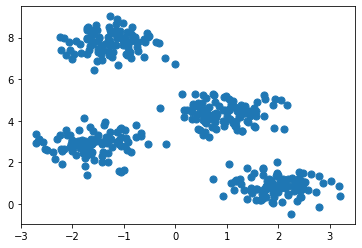

In [10]:
#Import the function that enables us to plot clusters
from sklearn.datasets import make_blobs

#Get points such that they form 3 visually separable clusters
X, y = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.50, random_state=0)


#Plot the points on a scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50);

In [11]:
#Import the K-Means Class
from sklearn.cluster import KMeans

#Initializr the K-Means object. Set number of clusters to 4, 
#centroid initilalization as 'random' and maximum iterations to 10

kmeans = KMeans(n_clusters=4, init='random', max_iter=10)

#Compute the K-Means clustering 
kmeans.fit(X)

#Predict the classes for every point
y_pred = kmeans.predict(X)
#y_pred


In [12]:
y_pred

array([2, 3, 3, 0, 3, 2, 1, 0, 3, 1, 2, 1, 0, 3, 3, 1, 3, 1, 0, 3, 3, 3,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 3, 0, 3, 2, 1, 0, 1, 0, 3, 2, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 3,
       1, 0, 3, 2, 3, 0, 3, 2, 1, 3, 0, 3, 2, 3, 3, 0, 1, 2, 0, 3, 3, 0,
       3, 1, 3, 1, 0, 3, 3, 2, 0, 1, 1, 1, 2, 1, 0, 0, 3, 2, 0, 2, 1, 3,
       3, 3, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2,
       2, 3, 0, 3, 2, 0, 2, 3, 0, 3, 3, 2, 3, 1, 0, 3, 1, 3, 1, 0, 1, 0,
       2, 3, 1, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1,
       0, 3, 0, 2, 0, 2, 3, 0, 2, 3, 2, 0, 0, 2, 0, 0, 2, 3, 2, 2, 2, 1,
       1, 0, 0, 3, 1, 1, 2, 0, 3, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2,
       3, 0, 2, 3, 3, 3, 1, 2, 0, 2, 0, 3, 0, 0, 2, 1, 3, 1, 0, 3, 1, 0,
       0, 2, 1, 0, 2, 0, 1, 3, 3, 1, 3, 0, 2, 2, 0, 0, 1, 2, 0, 3, 3, 3,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 3, 0, 1, 3, 0, 1, 1, 0, 3, 2,

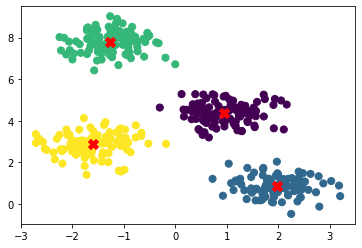

In [13]:
#Plot the data points again but with different colors for different classes
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

#Get the list of the final centroids
centroids = kmeans.cluster_centers_

#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')

- Finding the optimal number of cluster using **The Elbow Method**

    - Calculate the Within-cluster sum of squared error (WSS) for different values of K, and choose the k for which WSS becomes fits start to diminish.

<AxesSubplot:>

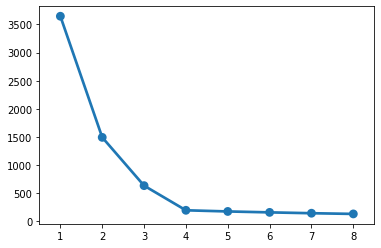

In [14]:
#List that will hold the sum of square values for different cluster sizes
ss = []

#We will compute SS for cluster sizes between 1 and 8.
for i in range(1,9):
    
    #Initlialize the KMeans object and call the fit method to compute clusters 
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    
    #Append the value of SS for a particular iteration into the ss list
    ss.append(kmeans.inertia_)

#Plot the Elbow Plot of SS v/s K
sns.pointplot(x=[j for j in range(1,9)], y=ss)

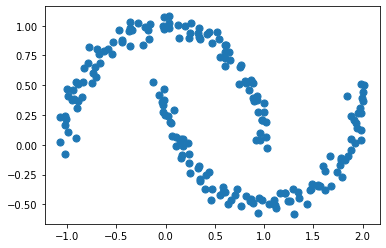

In [15]:
#Import the half moon function from scikit-learn
from sklearn.datasets import make_moons

#Get access to points using the make_moons function
X_m, y_m = make_moons(200, noise=.05, random_state=0)

#Plot the two half moon clusters
plt.scatter(X_m[:, 0], X_m[:, 1], s=50);

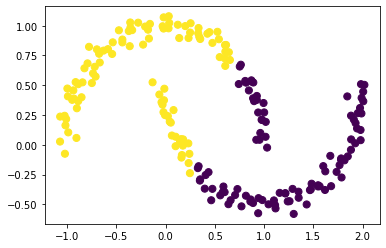

In [16]:
#Initialize K-Means Object with K=2 (for two half moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

#Predict the classes for the data points
y_m_pred = kmm.predict(X_m)

#Plot the colored clusters as identified by K-Means
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50)

-  Applying K-Means will find two centroid and label the points based on centroid they are close too

#### Spectral Clustering

- Spectral Clustering uses the connectivity approach to clustering, wherein communities of points that are connected or immediately next to each other are identified based mainly on a pairwise similarities between those data points.

/opt/anaconda3/envs/dev/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


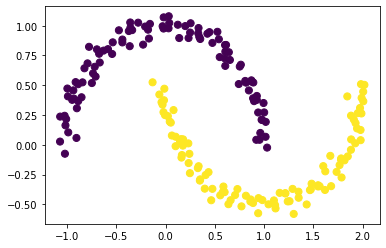

In [17]:
#Import Spectral Clustering from scikit-learn
from sklearn.cluster import SpectralClustering

#Define the Spectral Clustering Model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

#Fit and predict the labels
y_m_sc = model.fit_predict(X_m)

#Plot the colored clusters as identified by Spectral Clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50);


## Dimensionality Reduction
- The number of input variables or features for a dataset is referred to as its dimensionality.
- Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset, but finding the relationship in which some variables can represent other variables.

### Principal Component Analysis (1901)
- Decompose high-dimensional data into most statistically descriptive factors.
- Provide a low-dimensional approximation to high-dimensional data in terms of dominant patterns.
- A data driven method that that present a hierarchical representation of the data in terms of a new coordinate system defined by dominant correlations between the data.
- PCA is a technique for feature extraction, because it combines our input variables in a specific way, then we can drop the "least important" variables while still retaining the most valuable parts of all the variables.
- 

In [19]:
# Load the Iris dataset into Pandas DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal_length','sepal_width','petal_length','petal_width','class'])

#Display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Sepal Features')

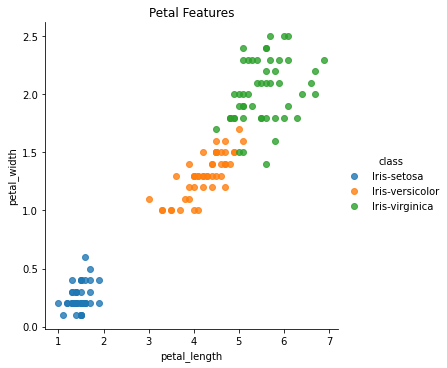

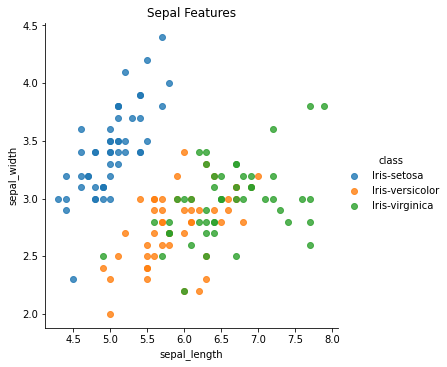

In [20]:

sns.lmplot(x='petal_length', y='petal_width', data=iris, hue='class', fit_reg=False)
plt.title('Petal Features')

sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='class', fit_reg=False)
plt.title('Sepal Features')

Applying PCA:

- we need first to scale the data all data features because sepal lenght are much longer that the petal widths, in order for our algorithm to treat all the features equally.

In [21]:
#Import Standard Scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

#Separate the features and the class
X = iris.drop('class', axis=1)
y = iris['class']

# Scale the features of X
X = pd.DataFrame(StandardScaler().fit_transform(X), 
                 columns = ['sepal_length','sepal_width','petal_length','petal_width'])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [22]:
#Import PCA
from sklearn.decomposition import PCA

#Intialize a PCA object to transform into the 2D Space.
pca = PCA(n_components=2)

#Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data = pca_iris, columns = ['PC1', 'PC2'])


# the data after reducing the size of features into 50%
pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [20]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [23]:
#Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis = 1)

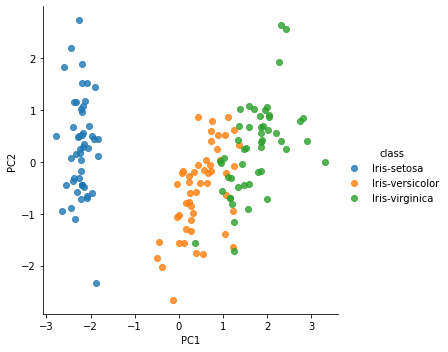

In [24]:
#Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)


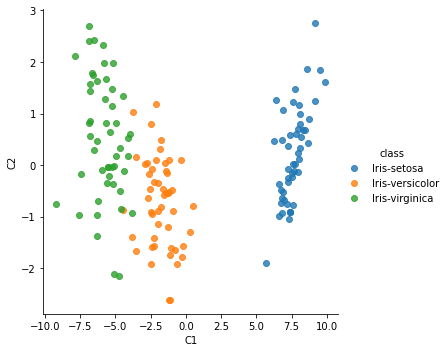

In [25]:
#Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Define the LDA Object to have two components
lda = LinearDiscriminantAnalysis(n_components = 2)

#Apply LDA
lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data = lda_iris, columns = ['C1', 'C2'])

#Concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis = 1)

#Display the scatterplot
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

### Try to apply a simple calssifcation model such as linear regression before and after PCA and see to what extent this affect the accuracy of the classifier ?

Machine  Learning  systems  can  be  classified  according  to  the  amount  and  type  of supervision  they  get  during  training.


## Supervised Learning
- Exercising an algorithm on known observation until it achieves a desirable level of performance.
    - Linear Regression,
    - Logistic Regression
    - Support Vector Machines
    - Naive Bayes
    - Decision Tress and Random Forests
    - Neural Networks
- A typical supervised learning task is classification. The spam filter example: training with many example emails with their class and the algorithms learns how classify new emails.

<img src="classification.png" style="width:50%; height:50%;">

- Another type is regression: trying to predict a target numeric value, such as the price of a car, given a set of features (milage, age, brand, etc) called predictors.

<img src="regression.png" style="width:50%; height:50%;">


## Unsupervised Learning 
- The trainging data is not labeled, The system tries to learn without a teacher 
    - Clustering :
        - K-means
        - DBSCAN
        - Hierarchical Cluster Analysis (HCA)
    - Visualization and dimensionality reduction
        - Principal Component Analysis
        - ...
    - Association Rule learning 
        - Apriori
        - Eclat

## Example : Gradient Boosting

- A method of ensemble learning algorithms, that works by sequentially adding predictors to an ensemble of learning algorithms, each one correcting its predecessor in wich this new algorithms is fitted to the residual errors made the previous one.

In [26]:
#Divide the dataset into the feature dataframe and the target class series.
X, y = iris.drop('class', axis=1), iris['class']

#Split the data into training and test datasets. 
#We will train on 75% of the data and assess our performance on 25% of the data

#Import the splitting funnction
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Apply Gradient Boosting to the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

#Compute the accuracy on the test set
gbc.score(X_test, y_test)

0.9736842105263158

<AxesSubplot:>

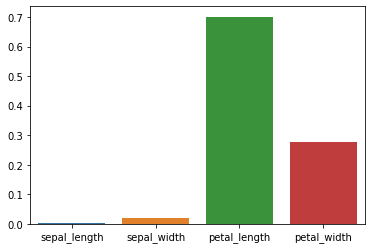

In [27]:
#Display a bar plot of feature importances
sns.barplot(x= ['sepal_length','sepal_width','petal_length','petal_width'], y=gbc.feature_importances_)

- try to use PC to see the score of GridentBoosting Classifer or using just two features that has more importance ?

In [29]:
## using the results from PCA we can see the drop from the accuracy.

#Divide the dataset into the feature dataframe and the target class series.
X, y = pca_iris.drop('class', axis=1), pca_iris['class']

#Split the data into training and test datasets. 
#We will train on 75% of the data and assess our performance on 25% of the data

#Import the splitting funnction
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Apply Gradient Boosting to the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

#Compute the accuracy on the test set
gbc.score(X_test, y_test)

0.8421052631578947

Some resources :
- Quick start towards python for data science
    - https://cognitiveclass.ai/courses/course-v1:CognitiveClass+PY0101EN+v3
- statistics:
    - https://www.hackerrank.com/domains/tutorials/10-days-of-statistics
    - DISCOVERING STATISTIC SUSING R/Python by Andy Field


- Machine learning :
    - Hands-on  Machine Learning  with  Scikit-Learn, Keras & TensorFlow by Aurélien Géron

- Recommender System with Neural Network using Tensorflow
    - https://www.tensorflow.org/recommenders/examples/quickstart


Email: ayoub.majjodi@uib.no